# Data 422

Data Wrangling, S2 2019

## Assignement 1

**20% of final grade** Total marks is **100 marks** (70 for R, 30 for Julia).

## Due date: 11am Friday 23 August 2019

The assignment must be submitted on the DATA 201 and 422 Learn page and should be **your own work**.

### Avoid plagiarism (see this [video on academic plagiarism](https://www.youtube.com/embed/reGGPUrEsC0) ). If you are not sure what may constitute code plagiarism, read this [explanation on source code plagiarism](http://web.science.mq.edu.au/~mtaylor/ponline/index.php?id=source-code-plagiarism). Remember, when in doubt **declare your sources**. 

If you have any issues that affects your ability to work during the time allocated for the assignement, please DO CONTACT ME. We will find a suitable solution. In general this WON'T be an extension to the deadline (so that in the rest of the semester you are free from preoccupations). Most probably, I will ask you to submit what you have ready by the time the assignment is due, even if it is not everything we required, and I'll take into account special considerations. For any particular problem, please contact [Giulio Dalla Riva](giulio.dallariva@canterbury.ac.nz) or the TAs (using keybase).

## Instruction

For this assignment you will work with a _.csv_ data-set. Your goal is to read it in, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  
You shall hand in your work as a jupyter-lab R notebook (for the R part, and jupyter-lab Julia notebook for the Julia part) comprehending the code, the plots and, **very important**, enough comments and explanations for us to understand what you did, how you did it, and why you did it. Remember: no comments, no marks.  
You can either modify this notebook or write a new one from scratch: in that case, clearly indicate which question you are asking at each step. Notice that you may well want to **use more than one cell** per answer (using some cell for the code, some for the text, and so forth).

## Comment, explain, present your work in a clear way (we may remove marks for messy notebooks)

## R part (overall 70 marks)

Do use the tidyverse syntax I introduced in class and labs. If in doubt, refresh the lab material 1 to 4.

The first thing you may want to do is to load **tidyverse**:

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.4.0
Warning message:
“package ‘tibble’ was built under R version 3.5.2”Warning message:
“package ‘tidyr’ was built under R version 3.5.2”Warning message:
“package ‘purrr’ was built under R version 3.5.2”Warning message:
“package ‘dplyr’ was built under R version 3.5.2”Warning message:
“package ‘forcats’ was built under R version 3.5.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Task (a): import (5 marks)

Import the **hour.csv** dataset into R as a dataframe (we'll call it `bike_df`, but you can call it what you want). You can read about the dataset in the file `DataSet_Dictionary.txt`. (Alternatively, you might use your own .csv dataset of choice, but talk with me about it before doing it). 

Then perform the routine checks about the types of the columns, the missing values, and output a quick summary of the dataset.

_hint_ useful functions: `read_csv()`, `glimpse()`  
_hint_ useful libraries: `tidyverse`, `readr`, `skimr`, `vis_dat`

In [4]:
# Load required packages
library(skimr)


Attaching package: ‘skimr’

The following object is masked from ‘package:stats’:

    filter



In [3]:
# Read the csv file and assign it to a dataframe named bike_df, the read_csv function also give us the name of the columns and their type
bike_df <- read_csv("hour.csv")

Parsed with column specification:
cols(
  instant = col_double(),
  dteday = col_date(format = ""),
  season = col_double(),
  yr = col_double(),
  mnth = col_double(),
  hr = col_double(),
  holiday = col_double(),
  weekday = col_double(),
  workingday = col_double(),
  weathersit = col_double(),
  temp = col_double(),
  atemp = col_double(),
  hum = col_double(),
  windspeed = col_double(),
  casual = col_double(),
  registered = col_double(),
  cnt = col_double()
)


In [7]:
# skim and kable will generate a quick summary of the dataset,each row in the tables describes a column of the dataframe.
bike_df %>%
  skim() %>%
  kable()

Skim summary statistics  
 n obs: 17379    
 n variables: 17    

Variable type: Date

| variable | missing | complete |   n   |    min     |    max     |   median   | n_unique |
|----------|---------|----------|-------|------------|------------|------------|----------|
|  dteday  |    0    |  17379   | 17379 | 2011-01-01 | 2012-12-31 | 2012-01-02 |   731    |

Variable type: numeric

|  variable  | missing | complete |   n   |  mean  |   sd    |  p0  |  p25   | p50  |   p75   | p100  |   hist   |
|------------|---------|----------|-------|--------|---------|------|--------|------|---------|-------|----------|
|   atemp    |    0    |  17379   | 17379 |  0.48  |  0.17   |  0   |  0.33  | 0.48 |  0.62   |   1   | ▁▃▆▇▇▆▁▁ |
|   casual   |    0    |  17379   | 17379 | 35.68  |  49.31  |  0   |   4    |  17  |   48    |  367  | ▇▂▁▁▁▁▁▁ |
|    cnt     |    0    |  17379   | 17379 | 189.46 | 181.39  |  1   |   40   | 142  |   281   |  977  | ▇▅▂▂▁▁▁▁ |
|  holiday   |    0    |  17379   | 1

We found no missing value in out dataset

### Task (b): working on rows (10 marks)


Working on `bike_df`, show that you can operate on rows: arranging them, getting the top _n_ according to some variable of your choice, filtering them (eventually using your own functions).

_hint_ useful functions: `arrange()`, `top_n()`, `filter()`  
_hint_ to define a function: `myfunction <- function(myargument,anotherargument) { bodyofthefunction }`

In [11]:
#arrange the dataset by count of total bikes rental (high to low), frist 6 row showed.
bike_df %>% arrange(desc(cnt)) %>% head()

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14965,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
14749,2012-09-11,3,1,9,17,0,2,1,1,0.70,0.6364,0.28,0.0000,168,802,970
14726,2012-09-10,3,1,9,18,0,1,1,1,0.62,0.6212,0.35,0.2985,111,857,968
15085,2012-09-25,4,1,9,17,0,2,1,1,0.66,0.6212,0.39,0.2836,107,860,967
15781,2012-10-24,4,1,10,17,0,3,1,1,0.66,0.6212,0.47,0.0000,87,876,963


In [7]:
# top 5 hour records with the highest windspeed
bike_df %>% top_n(5, windspeed)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1260,2011-02-25,1,0,2,15,0,5,1,1,0.46,0.4545,0.41,0.8060,5,50,55
4316,2011-07-03,3,0,7,17,0,0,0,3,0.80,0.7424,0.49,0.8507,181,177,358
4317,2011-07-03,3,0,7,18,0,0,0,3,0.80,0.7424,0.49,0.8507,74,107,181
5636,2011-08-27,3,0,8,17,0,6,0,3,0.64,0.5758,0.89,0.8358,2,14,16
9957,2012-02-24,1,1,2,21,0,5,1,1,0.42,0.4242,0.35,0.8060,1,151,152


In [6]:
#hour records that on holiday
bike_df %>% filter(holiday == 1) %>% head()

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
373,2011-01-17,1,0,1,0,1,1,0,2,0.20,0.1970,0.47,0.2239,1,16,17
374,2011-01-17,1,0,1,1,1,1,0,2,0.20,0.1970,0.44,0.1940,1,15,16
375,2011-01-17,1,0,1,2,1,1,0,2,0.18,0.1667,0.43,0.2537,0,8,8
376,2011-01-17,1,0,1,3,1,1,0,2,0.18,0.1818,0.43,0.1940,0,2,2
377,2011-01-17,1,0,1,4,1,1,0,2,0.18,0.1970,0.43,0.1343,1,2,3
378,2011-01-17,1,0,1,5,1,1,0,2,0.18,0.1970,0.43,0.1642,0,1,1


In [13]:
# A function return records from a given year and month 
monthrecord <- function(year ,month){filter(bike_df, yr == year & mnth == month)}
# test the function (February, 2011)
monthrecord(0,2) %>% head()

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
689,2011-02-01,1,0,2,0,0,2,1,2,0.16,0.1818,0.64,0.1045,2,6,8
690,2011-02-01,1,0,2,1,0,2,1,2,0.16,0.1818,0.69,0.1045,0,3,3
691,2011-02-01,1,0,2,2,0,2,1,2,0.16,0.2273,0.69,0.0000,0,2,2
692,2011-02-01,1,0,2,3,0,2,1,2,0.16,0.2273,0.69,0.0000,0,2,2
693,2011-02-01,1,0,2,5,0,2,1,3,0.14,0.2121,0.93,0.0000,0,3,3
694,2011-02-01,1,0,2,6,0,2,1,3,0.14,0.2121,0.93,0.0000,0,22,22


### Task (c): working on columns (10 marks)

Working on `bike_df`, show that you can operate on columns: selecting some of them, dropping other, renaming them, reordering them, ...


_hint_ useful functions: `select()`, `rename()`, ...

In [14]:
#select only the date and count column and show only a few rows
bike_df %>%
  select(c("dteday","cnt")) %>%
  head()

dteday,cnt
<date>,<dbl>
2011-01-01,16
2011-01-01,40
2011-01-01,32
2011-01-01,13
2011-01-01,1
2011-01-01,1


In [17]:
#select all columns except the weathersit column and only display a few of them.
bike_df %>%
  select(-"weathersit") %>%
  head()

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,0.24,0.2576,0.75,0.0896,0,1,1


In [19]:
#rename the column name hum to humidity
bike_df %>% 
  rename(humidity = hum) %>% head()

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [21]:
#order columns alphabetically
bike_df %>% select(order(colnames(.))) %>% head()

atemp,casual,cnt,dteday,holiday,hr,hum,instant,mnth,registered,season,temp,weathersit,weekday,windspeed,workingday,yr
<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2879,3,16,2011-01-01,0,0,0.81,1,1,13,1,0.24,1,6,0.0000,0,0
0.2727,8,40,2011-01-01,0,1,0.80,2,1,32,1,0.22,1,6,0.0000,0,0
0.2727,5,32,2011-01-01,0,2,0.80,3,1,27,1,0.22,1,6,0.0000,0,0
0.2879,3,13,2011-01-01,0,3,0.75,4,1,10,1,0.24,1,6,0.0000,0,0
0.2879,0,1,2011-01-01,0,4,0.75,5,1,1,1,0.24,1,6,0.0000,0,0
0.2576,0,1,2011-01-01,0,5,0.75,6,1,1,1,0.24,2,6,0.0896,0,0


### Task (d): groups and not (10 marks)

Working on `bike_df`, show that you can produce new variables (columns) and modify existing one; show also that you can operate on the dataframe as a whole and on groups. See *Readme.txt* to get an understanding of the variable scaling applied.

_hint_ useful functions: `mutate()`, `group_by()`, `summarise()`, `tally()`, ...

In [22]:
# use mutate() to create new columns or modify exsiting ones
# create a new column contain the real temperature calculated from the normalized temperature
bike_df %>%
    mutate(realtemp = temp * 41)%>%
#    head()

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,realtemp
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,9.84
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,9.02
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,9.02
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,9.84
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,9.84
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,9.84


In [41]:
# the average count of rental bikes each year
bike_df %>%
    select(c("yr","cnt")) %>%
    group_by(yr) %>%
    summarise(mean_cnt = mean(cnt)) %>%
    head()

yr,mean_cnt
<dbl>,<dbl>
0,143.7944
1,234.6664


In [38]:
# count the number of bikes rental each year
bike_df %>%
    select(c("yr","cnt")) %>%
    group_by(yr) %>%
    tally(name = "count") %>%
    head()

yr,count
<dbl>,<int>
0,8645
1,8734


### Task (e): wide, long, tidy (10 marks)

Show that you can go back and forth between the long and the wide format of a dataframe. Then produce a tidy version of `bike_df` (or, if you think the original one is is already in the tidy data shape, explain why).

_hint_ useful functions: `spread()`, `gather()`, `na.omit()`, ...

### Task (f): plot (10 marks)

Produce a beautiful graphical representation of the data in `bike_df` or of _some_ of the data in `bike_df`. You can try different geometries, themes, mappings, ... . Make sure you label the plots with titles, and axis labels. Notice that the focus is on the use of *plotting as a data model*, rather than on the *statistical modelling* of the data.
\[ Hint: if you can't find any plotting idea, try focusing on the count of total rental bikes, and how it varies through time, season, weather, temperature, humidty, wind-speed. \]

_hint_ useful functions: `ggplot()`, `ylab()`, `xlab()`, `geom_...()`, `aes()`, `facet_...()`, ...

In [43]:
#load required package
library(ggplot2)
library(scales)


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



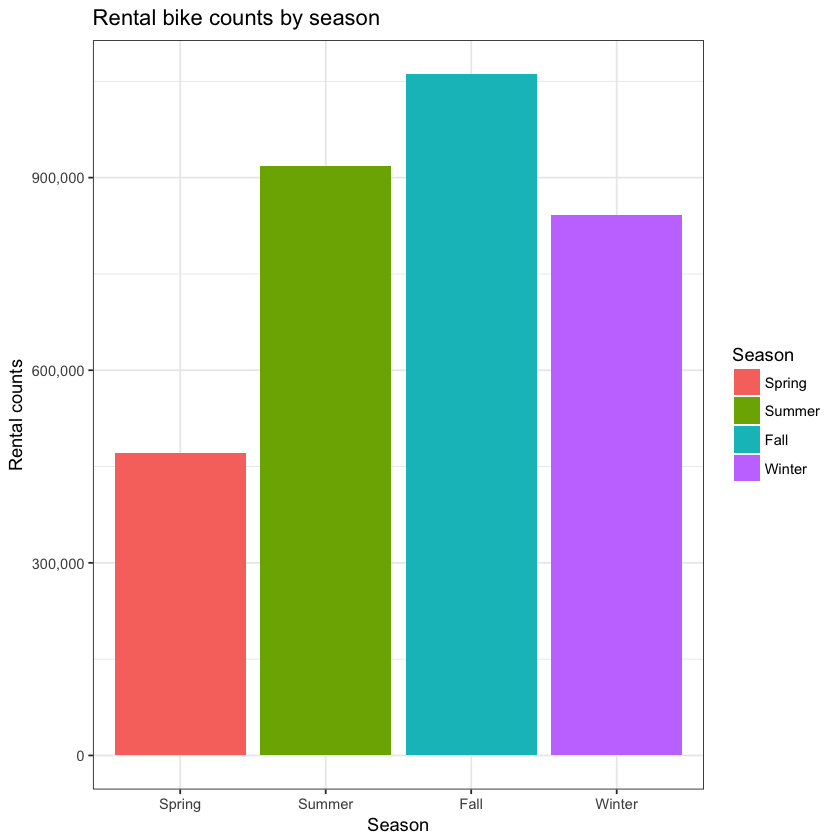

In [53]:
#prepare the data for ploting
season_df = bike_df %>%
  select(c("season","cnt")) %>%
  group_by(season) %>%
  summarise(count = sum(cnt))
season_df$season <- factor(c("Spring", "Summer", "Fall", "Winter"), levels = c("Spring", "Summer", "Fall", "Winter"))

#plot the graph
ggplot(season_df, aes(x=season, y=count, fill = season)) +geom_bar(stat="identity")+ 
  scale_y_continuous(name="Rental counts", labels = comma)+
  labs(title="Rental bike counts by season", x="Season")+
  scale_fill_discrete(name = "Season")+
  theme_bw()

### Task (g): save (5 marks)

Save your plot from Task (f) and your tidy dataset from Task (g) to disk. 

_hint_ useful functions: `write_csv()`, `ggsave()`,...

In [6]:
#save the most recent plot(task f) to disk.
ggsave("plot.png") 

### Challenge question (10 marks)

You are the data scientist working for a bike rental company. The `hour.csv` is the data you have available. The bike rental CEO sometimes wakes up in the morning with these strange ideas, and you get to test them.

One of the key element for the company is being sure that there are always enough bikes available for the users. So, we need to understand what makes a user rent a bike and what makes a user NOT rent a bike.
Your CEO noticed thinks that one of the peak times for the registered users renting bikes is between 6am and 10am.

Task (1): make a plot to check that (take seasonality into account in the plot).

She also thought about an interesting hypothesis. A registered user usually finish working around 5pm. Between 5pm and 10pm, they notice the weather: in particular, the registered users are sensible to how good the weather is, and how stable it is. The morning after, between 6am and 10am, the amount of registered users renting a bike to go to work depends on the previous afternoon weather.

Task (2): make one or more plot to test this hypothesis (again, consider seasonality in the plot).

\[ Hints: 

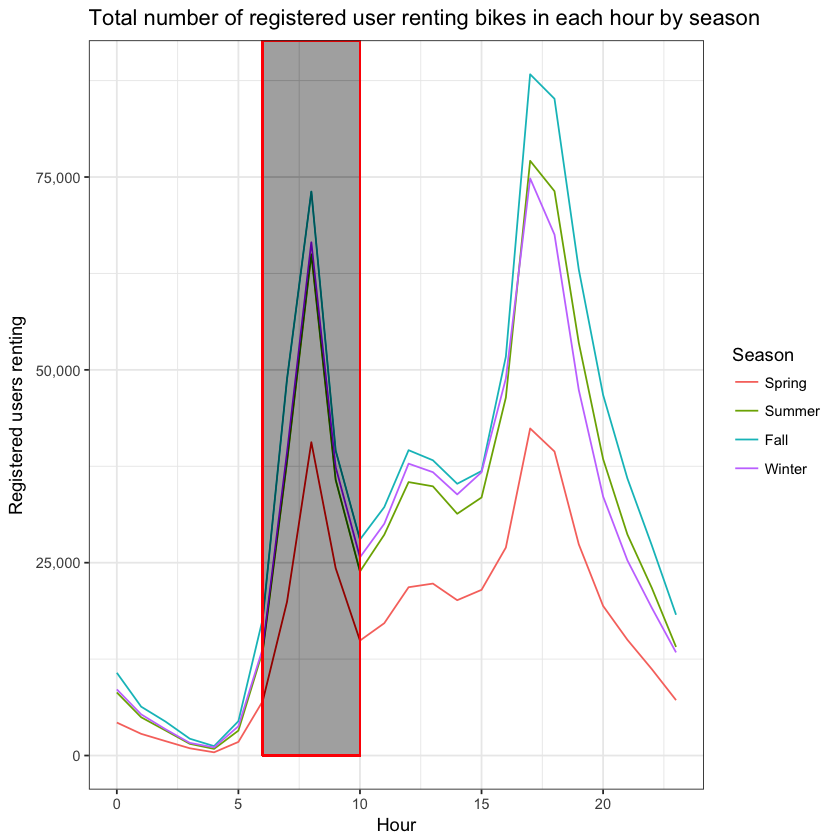

In [51]:
#Task(1)
season_hour_df = data.frame(hour = 0:23)

for (i in 1:4){
season <-bike_df[bike_df$season == i, c("hr","registered")]%>%
  group_by(hr) %>%
  summarise(season_count = sum(registered))
season_hour_df[,i+1] = season[,2]
}
colnames(season_hour_df) = c("Hour","Spring","Summer","Fall","Winter")

season_hour_df<- gather(season_hour_df,key = Season,
       value=registered,Spring,Summer,Fall,Winter, -Hour)

season_hour_df$Season = factor(season_hour_df$Season, levels = c("Spring", "Summer", "Fall", "Winter"))

ggplot(season_hour_df, aes(x=Hour, y=registered, colour=Season))+
  scale_y_continuous(name="Registered users renting", labels = comma)+
  geom_line()+
  geom_rect(aes(xmin=6, xmax=10, ymin=0, ymax=Inf),
            colour="red",
            alpha=0.005)+
  ggtitle("Total number of registered user renting bikes in each hour by season ")+
  theme_bw()

The CEO's assumption is true because there is a peak inside the highlighted time range for all seasons (6am to 10am). And there is another higher peak between 3pm and 8pm.


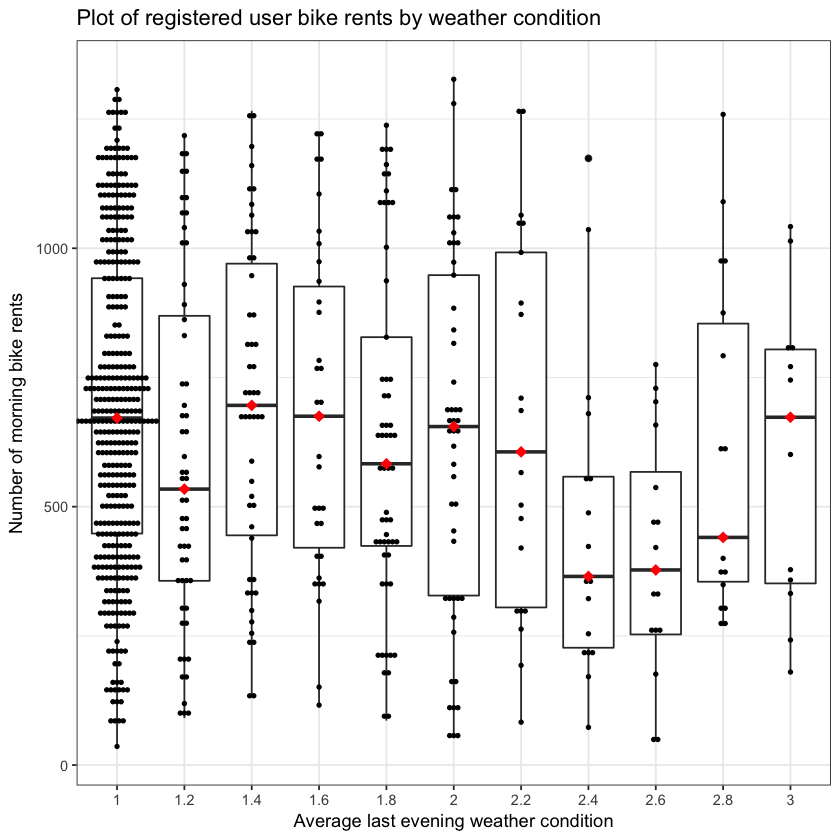

In [62]:
evening_df <- bike_df[bike_df$hr >17 & bike_df$hr <23 , c("dteday","weathersit")]%>%
  group_by(dteday) %>%
  summarise(weather_mean = mean(weathersit),weather_var = var(weathersit))
next_morning <- bike_df[bike_df$hr >7 & bike_df$hr <11 , c("dteday","registered")]%>%
  group_by(dteday) %>%
  summarise(morning_count = sum(registered))

task2_df <-merge(evening_df,next_morning,by="dteday")
for (i in 1:nrow(task2_df)){
task2_df$next_morning[i] <- task2_df$morning_count[i+1]
}

task2_df<-task2_df[-nrow(task2_df),]



ggplot(task2_df, aes(x=factor(weather_mean), y=next_morning)) + 
  geom_boxplot()+
  geom_dotplot(binaxis='y', stackdir='center',stackratio=1, dotsize=0.4,binwidth = 20)+
  stat_summary(fun.y=median, geom="point", shape=18,
               size=3, color="red")+
  labs(title="Plot of registered user bike rents by weather condition",
       x="Average last evening weather condition", y="Number of morning bike rents")+
  theme_bw()

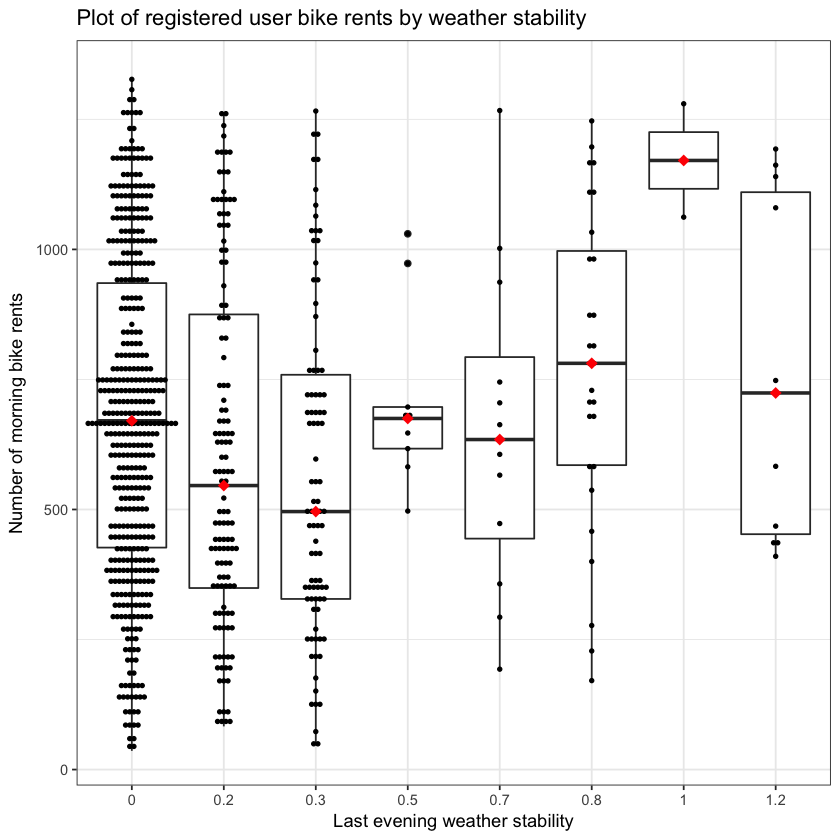

In [61]:
ggplot(task2_df, aes(x=factor(weather_var), y=next_morning)) + 
  geom_boxplot()+
  geom_dotplot(binaxis='y', stackdir='center',stackratio=1, dotsize=0.4,binwidth = 20)+
  stat_summary(fun.y=median, geom="point", shape=18,
               size=3, color="red")+
  labs(title="Plot of registered user bike rents by weather stability",
       x="Last evening weather stability", y="Number of morning bike rents")+
  theme_bw()